<a href="https://colab.research.google.com/github/FelipeDourado96/brasileirao_serie_b_2023/blob/main/notebooks/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Loading

In [63]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

In [64]:
from google.colab import files

uploaded = files.upload()

Saving brasileirao_serie_b_2023.csv to brasileirao_serie_b_2023 (4).csv


In [67]:
url = "brasileirao_serie_b_2023.csv"
file = pd.read_csv(url, encoding='latin', sep=';')

df = pd.DataFrame(file)
df.head(5)

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes
0,16/04/2023,18:00,Srie B,Matchweek 1,Sun,Home,W,3,0,Ponte Preta,43,"20,751",Zeca,4-2-3-1,4-2-3-1,Wagner do Nascimento Magalhes,Match Report,NaN
1,23/04/2023,17:00Ê(18:00),Srie B,Matchweek 2,Sun,Away,W,3,0,ABC,63,"6,57",Zeca,4-2-3-1,04/04/2002,Matheus Delgado Candanan,Match Report,NaN
2,28/04/2023,19:00,Srie B,Matchweek 3,Fri,Home,W,2,0,Londrina,53,"24,222",Zeca,4-2-3-1,4-2-3-1,Paulo Henrique Schleinch Vollkopf,Match Report,NaN
3,10/05/2023,19:00,Srie B,Matchweek 4,Wed,Away,W,2,0,Cear,34,NaN,Zeca,4-2-3-1,4-2-3-1,Bruno Mota Correia,Match Report,NaN
4,05/05/2023,21:30,Srie B,Matchweek 5,Fri,Away,W,3,0,Botafogo (SP),45,"3,426",Zeca,4-2-3-1,4-2-3-1,Savio Pereira,Match Report,NaN


#Data Cleaning and Feature Engineering

In [68]:
# Keeping only the important columns

df_filtered = df[['Round','Venue','Result','GF','GA','Opponent','Poss','Attendance','Captain','Formation','Referee']]
df_filtered.head()

,Round,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Referee
0,Matchweek 1,Home,W,3,0,Ponte Preta,43,"20,751",Zeca,4-2-3-1,Wagner do Nascimento Magalhes
1,Matchweek 2,Away,W,3,0,ABC,63,"6,57",Zeca,4-2-3-1,Matheus Delgado Candanan
2,Matchweek 3,Home,W,2,0,Londrina,53,"24,222",Zeca,4-2-3-1,Paulo Henrique Schleinch Vollkopf
3,Matchweek 4,Away,W,2,0,Cear,34,NaN,Zeca,4-2-3-1,Bruno Mota Correia
4,Matchweek 5,Away,W,3,0,Botafogo (SP),45,"3,426",Zeca,4-2-3-1,Savio Pereira


In [69]:
# Display statistics

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Round       38 non-null     object
 1   Venue       38 non-null     object
 2   Result      38 non-null     object
 3   GF          38 non-null     int64 
 4   GA          38 non-null     int64 
 5   Opponent    38 non-null     object
 6   Poss        38 non-null     int64 
 7   Attendance  37 non-null     object
 8   Captain     38 non-null     object
 9   Formation   38 non-null     object
 10  Referee     38 non-null     object
dtypes: int64(3), object(8)
memory usage: 3.4+ KB


In [70]:
# Column with wrong DataType

df_filtered['Attendance'] = (df_filtered['Attendance'].astype(str).str.replace(',', '', regex = False))
df_filtered['Attendance'] = pd.to_numeric(df_filtered['Attendance'],errors = 'coerce').astype('Int64')

df_filtered['Round'] = (df_filtered['Round'].astype(str).str.replace('Matchweek ', '', regex = False))
df_filtered['Round'] = pd.to_numeric(df_filtered['Round'],errors = 'coerce').astype('Int64')

/tmp/ipython-input-2597798073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Attendance'] = (df_filtered['Attendance'].astype(str).str.replace(',', '', regex = False))
/tmp/ipython-input-2597798073.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Attendance'] = pd.to_numeric(df_filtered['Attendance'],errors = 'coerce').astype('Int64')
/tmp/ipython-input-2597798073.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [71]:
# Correcting Attendance and Formation values

df_filtered.loc[df_filtered['Attendance'] == 10, 'Attendance'] = 10000
df_filtered.loc[df_filtered['Attendance'] == 2384, 'Attendance'] = 23840
df_filtered['Attendance'] = df_filtered['Attendance'].fillna(0)


df_filtered.loc[(df_filtered['Formation'] == '03/04/2003') | (df_filtered['Formation'] == '04/03/2003') | (df_filtered['Formation'] == '05/04/2001') | (df_filtered['Formation'] == '04/03/2002') | (df_filtered['Formation'] == '04/04/2002'), 'Formation'] = '4-2-3-1'

df_filtered = df_filtered.sort_values('Round')

/tmp/ipython-input-2396016617.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Attendance'] = df_filtered['Attendance'].fillna(0)


In [72]:
# Create columns GD (Goals Difference), PPG (Points per Game) and TP (total points)

GD = 0
GD_list = []
for i in df_filtered.index:
  GD = GD + df_filtered.loc[i, 'GF'] - df_filtered.loc[i, 'GA']
  GD_list.append(GD)

df_filtered['GD'] = GD_list

#---------------------------------------------------------------

PPG = []

for i in df_filtered.index:
  if df_filtered.loc[i, 'Result'] == 'W':
    PPG.append(3)
  elif df_filtered.loc[i, 'Result'] == 'D':
    PPG.append(1)
  else:
    PPG.append(0)

df_filtered['PPG'] = PPG

#---------------------------------------------------------------

tp = 0
TP = []

for i in df_filtered.index:
  if df_filtered.loc[i, 'Result'] == 'W':
    tp += 3
    TP.append(tp)
  elif df_filtered.loc[i, 'Result'] == 'D':
    tp += 1
    TP.append(tp)
  else:
    TP.append(tp)

df_filtered['TP'] = TP

#---------------------------------------------------------------

df_filtered = df_filtered[['Round','Venue','Result','TP','GF','GA','GD','Opponent','PPG','Attendance','Poss','Captain','Formation','Referee']]

In [73]:
# Checking column's datatypes
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Round       38 non-null     Int64 
 1   Venue       38 non-null     object
 2   Result      38 non-null     object
 3   TP          38 non-null     int64 
 4   GF          38 non-null     int64 
 5   GA          38 non-null     int64 
 6   GD          38 non-null     int64 
 7   Opponent    38 non-null     object
 8   PPG         38 non-null     int64 
 9   Attendance  38 non-null     Int64 
 10  Poss        38 non-null     int64 
 11  Captain     38 non-null     object
 12  Formation   38 non-null     object
 13  Referee     38 non-null     object
dtypes: Int64(2), int64(6), object(6)
memory usage: 4.4+ KB


In [74]:
# Statistical informations about the club during the competition

df_filtered.groupby('Venue')[['GF']].describe()

GF                                             
      count      mean       std  min  25%  50%  75%  max
Venue                                                   
Away   19.0  1.105263  1.100239  0.0  0.0  1.0  2.0  3.0
Home   19.0  1.526316  0.964274  0.0  1.0  2.0  2.0  3.0

In [75]:
df_filtered.groupby('Venue')[['GA']].describe()

GA                                             
      count      mean       std  min  25%  50%  75%  max
Venue                                                   
Away   19.0  1.263158  1.446916  0.0  0.0  1.0  2.0  6.0
Home   19.0  0.368421  0.760886  0.0  0.0  0.0  0.5  3.0

In [76]:
df_filtered.groupby('Venue')[['Poss']].describe()

Poss                                                    
      count       mean        std   min   25%   50%   75%   max
Venue                                                          
Away   19.0  49.631579  10.377382  34.0  43.0  47.0  55.5  73.0
Home   19.0  53.105263   8.082180  34.0  47.5  54.0  59.5  66.0

In [77]:
df_filtered.groupby('Venue')[['Attendance']].describe()

Attendance                                                        \
           count          mean          std      min      25%      50%   
Venue                                                                    
Away        19.0   5802.789474  4893.472927      0.0   1887.5   4287.0   
Home        19.0  23393.526316   5854.11713  10848.0  21169.0  24189.0   

                         
           75%      max  
Venue                    
Away    9212.0  16847.0  
Home   28183.5  29168.0

In [78]:
# Total goals scored and conceded

gf_home = 0
gf_away = 0
for i in df_filtered.index:
  if df_filtered.loc[i, 'Venue'] == 'Home':
    gf_home += df_filtered.loc[i, 'GF']
  else:
    gf_away += df_filtered.loc[i, 'GF']
print(f"Goals scored at home: {gf_home}\nGoals scored away: {gf_away}")

#-----------------------------------------------------------------------
ga_home = 0
ga_away = 0

for i in df_filtered.index:
  if df_filtered.loc[i, 'Venue'] == 'Home':
    ga_home += df_filtered.loc[i, 'GA']
  else:
    ga_away += df_filtered.loc[i, 'GA']
print(f"Goals conceded at home: {ga_home}\nGoals conceded away: {ga_away}")

Goals scored at home: 29
Goals scored away: 21
Goals conceded at home: 7
Goals conceded away: 24


In [79]:
# Total points Home and Away

points_home = 0
points_away = 0

for i in df_filtered.index:
  if df_filtered.loc[i, 'Venue'] == 'Home':
    points_home += df_filtered.loc[i, 'PPG']
  else:
    points_away += df_filtered.loc[i, 'PPG']

home_pct = (points_home/(19*3)) * 100
away_pct = (points_away/(19*3)) * 100

print(f"Points at home: {points_home} ({round(home_pct, 2)}%)\nPoints away: {points_away} ({round(away_pct, 2)}%)")

Points at home: 45 (78.95%)
Points away: 27 (47.37%)


In [80]:
df_filtered

,Round,Venue,Result,TP,GF,GA,GD,Opponent,PPG,Attendance,Poss,Captain,Formation,Referee
0,1,Home,W,3,3,0,3,Ponte Preta,3,20751,43,Zeca,4-2-3-1,Wagner do Nascimento Magalhes
1,2,Away,W,6,3,0,6,ABC,3,657,63,Zeca,4-2-3-1,Matheus Delgado Candanan
2,3,Home,W,9,2,0,8,Londrina,3,24222,53,Zeca,4-2-3-1,Paulo Henrique Schleinch Vollkopf
3,4,Away,W,12,2,0,10,Cear,3,0,34,Zeca,4-2-3-1,Bruno Mota Correia
4,5,Away,W,15,3,0,13,Botafogo (SP),3,3426,45,Zeca,4-2-3-1,Savio Pereira
5,6,Home,L,15,2,3,12,Atl Goianiense,0,27415,54,Zeca,4-2-3-1,Joo Vitor Gobi
6,7,Away,L,15,0,2,10,Mirassol,0,1971,43,Zeca,4-2-3-1,Andr Luiz Skettino Policarpo Bento
7,8,Home,W,18,1,0,11,CRB,3,13754,58,Zeca,4-2-3-1,Alisson Sidnei Furtado
8,9,Away,D,19,1,1,11,Ava,1,4363,44,Rodrigo Andrade,4-2-3-1,Marcelo de Lima Henrique
9,10,Home,W,22,3,0,14,Ituano,3,21587,45,Zeca,4-2-3-1,Andr Luiz Skettino Policarpo Bento


##Exploratory Data Analisys (EDA)

#####Games played: 38
#####Features:
#
*   Round
*   Venue
*   Result
*   Total Points (TP)
*   Goals For (GF)
*   Goals Agains (GA)
*   Goals Difference (GD)
*   Opponent
*   Points Per Game (PPG)
*   Possession (%)
*   Attendance
*   Capitain
*   Formation
*   Referee

#####The match Ceará x Vitória has missing attendance data, as Ceará was sanctioned and required to play without fans due to misconduct by its supporters in previous matches.

<Axes: xlabel='Round', ylabel='TP'>

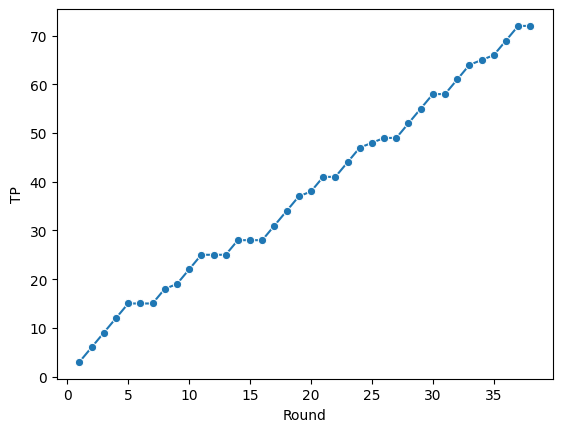

In [81]:
sns.lineplot(data = df_filtered,x = 'Round', y = 'TP', marker='o')

<function matplotlib.pyplot.show(close=None, block=None)>

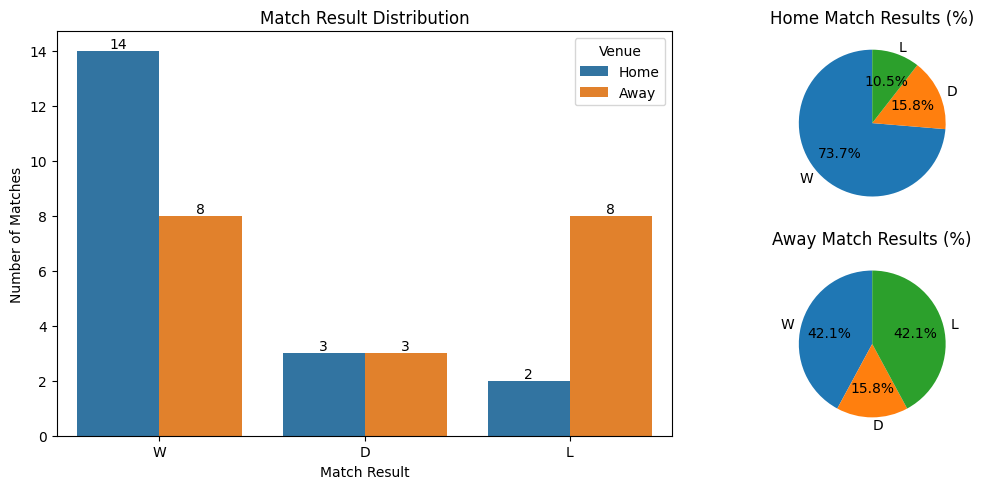

In [82]:
# Brasileirão Série B 2023 Match Results
# Home vs Away Results

fig = plt.figure(figsize=(12,5))
gs = GridSpec(nrows = 2, ncols = 2, figure = fig)

ax1 = fig.add_subplot(gs[:, 0])
sns.countplot(data = df_filtered, x = 'Result', hue = 'Venue', order = ['W','D','L'], ax = ax1)

for container in ax1.containers:
    ax1.bar_label(container)

ax1.set_xlabel('Match Result')
ax1.set_ylabel('Number of Matches')
ax1.set_title('Match Result Distribution')

#---------------------------------------------------------------

home_results = (df_filtered[df_filtered['Venue'] == 'Home']['Result'].value_counts().loc[['W','D','L']])

ax2 = fig.add_subplot(gs[0, 1])

ax2.pie(home_results.values, labels = home_results.index, autopct = '%1.1f%%', startangle=90)

ax2.set_title('Home Match Results (%)')

#---------------------------------------------------------------

away_results = (df_filtered[df_filtered['Venue'] == 'Away']['Result'].value_counts().loc[['W','D','L']])

ax3 = fig.add_subplot(gs[1, 1])

ax3.pie(away_results.values, labels = away_results.index, autopct = '%1.1f%%', startangle=90)

ax3.set_title('Away Match Results (%)')

#---------------------------------------------------------------

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

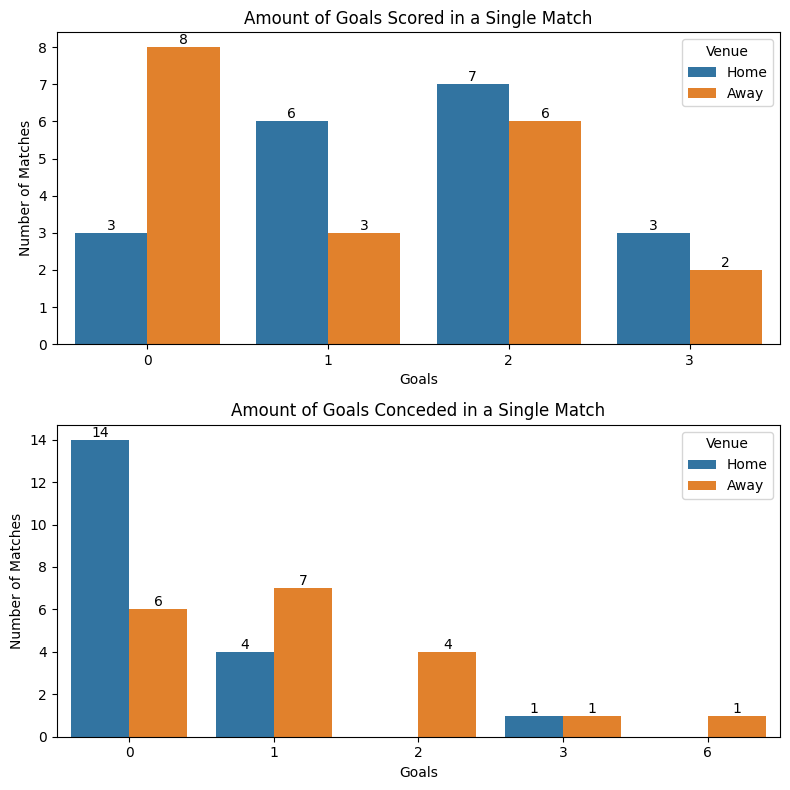

In [83]:
# Goals Scored at Home vs Scored Away
# Goals Conceded at Home vs Away

fig = plt.figure(figsize = (8, 8))
gs = GridSpec(nrows = 2, ncols = 1, figure = fig)

ax1 = fig.add_subplot(gs[0, 0])
sns.countplot(data = df_filtered, x = 'GF', hue = 'Venue', hue_order = ['Home','Away'], ax = ax1)

for container in ax1.containers:
    ax1.bar_label(container)

ax1.set_xlabel('Goals')
ax1.set_ylabel('Number of Matches')
ax1.set_title('Amount of Goals Scored in a Single Match')

#---------------------------------------------------------------

ax2 = fig.add_subplot(gs[1, 0])
sns.countplot(data = df_filtered, x = 'GA', hue = 'Venue', hue_order = ['Home','Away'], ax = ax2)

for container in ax2.containers:
    ax2.bar_label(container)

ax2.set_xlabel('Goals')
ax2.set_ylabel('Number of Matches')
ax2.set_title('Amount of Goals Conceded in a Single Match')


plt.tight_layout()
plt.show

#Key Insights

##🏟️ Home Advantage Was the Main Driver of the Title

Vitória’s championship campaign was strongly influenced by its exceptional home performance.
Playing at home, the team won 73.7% of matches and lost only 10.5%, earning points in 89.5% of home games. This level of consistency created a solid points base that sustained the team throughout the 38-round season.

Defensively, Vitória was extremely reliable at home. Out of 19 home matches, the team:

Conceded zero goals in 14 matches

Conceded only 1 goal in 4 matches

Suffered a higher number of goals in just one isolated match

This resulted in an average of 0.36 goals conceded per home match, highlighting a highly organized defensive structure when playing in its own stadium.

Offensively, home matches also showed consistency:

Vitória failed to score in only 3 matches

Scored 1–2 goals in the majority of games

Reached 3 goals in multiple occasions

This balance between defensive solidity and steady scoring made home matches a decisive factor in the title-winning campaign.

##✈️ Away Performance Was Balanced and Sufficient

While not as dominant as at home, Vitória’s away performance remained competitive and balanced.
The team earned points in 57.9% of away matches, with:

42.1% wins

15.8% draws

42.1% losses

Despite a more challenging defensive scenario away from home, the data shows that most matches followed a controlled pattern:

6 clean sheets

7 matches conceding only 1 goal

A limited number of games with 2 or 3 goals conceded

One match in which Vitória conceded 6 goals stands out as an outlier, given the overall defensive behavior in away fixtures. Excluding this anomaly, the defensive performance away from home remains consistent with a team capable of competing for the title.

Offensively, scoring away from home was more difficult, with 8 matches without goals, reinforcing the contrast between home and away effectiveness. However, the team still managed to score:

2 goals in 6 matches

3 goals in 2 matches

These results indicate that Vitória did not rely on dominance away from home, but rather on securing enough points to complement its strong home campaign.

##📊 Season Stability and Consistency

Across the season, Vitória showed limited performance volatility.
The longest negative sequence was never more than two consecutive defeats, and even the worst five-match stretch still included one victory. In contrast, the team recorded five sequences of two consecutive wins, including a five-win streak in the opening rounds, which significantly contributed to building an early advantage.

This stability, combined with home dominance and an adequate away performance, explains how Vitória sustained competitiveness across all 38 rounds and secured the championship.

##🏆 Final Conclusion

Vitória’s title was primarily built on home dominance, supported by a controlled and efficient away strategy.
Rather than relying on aggressive performance in every match, the team maximized results where it was strongest and avoided prolonged negative sequences, a profile commonly observed in championship-winning teams.